# Aircraft Safety Analysis Project

## Project Overview

This project aims to analyze aircraft safety by evaluating the risk associated with different aircraft models, engine types, and the number of engines. Utilizing historical incident data taken from [Kaggle.com](https://www.kaggle.com/), I calculated composite safety scores for each of the aforementioned categories to identify which configurations are deemed safest based on my analysis. 

The goal of this analysis is to assist those seeking to enter the aircraft industry in making informed decisions when purchasing the safest aircraft available. This dataset is particularly suitable for this use case as it encompasses extensive information regarding the aircraft configurations present in aviation accidents and incidents not only within the United States and its territories but also in international waters. 

**Dataset Overview:**
- **Entries**: Over 90,000 records
- **Coverage**: Aviation accidents and incidents within the United States, its territories, and international waters.
- **Columns**: 31 columns detailing various aspects of each incident or accident.

The breadth and depth of the data ensure a comprehensive analysis, shedding light on the important factors that contribute to aircraft safety and paving the way for informed decision-making in purchasing aircraft.


In [66]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#importing pandas,numpy,seaborn,matplotlib

path = "C:\\Users\\agamb\\Documents\\Flatiron\\Phase1\\Aviation_Data.csv"
df = pd.read_csv(path)
df.head()
#importing the data using pandas and displaying the head

C:\Users\agamb\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [67]:
df.info()
#investigating data's columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [68]:
df.isnull().sum()
#checking for total null rows per column

Event.Id                   1459
Investigation.Type            0
Accident.Number            1459
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Registration.Number        2776
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries      12860
Total.Serious.Injuries    13969
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition          5951
Broad.phase.of.flight     28624
Report.Status              7840
Publication.Date          16689
dtype: i

Here, I am dropping all rows that are null for make or model since this information is crucial to my analysis. I am also dropping columns that are irrelevant to my analysis.

In [70]:
df = df.dropna(subset=['Make', 'Model'], how='any')
#deleting rows that are null for either Make or Model

In [71]:
df = df.drop(columns=['Latitude', 'Longitude', 'Airport.Code', 'Airport.Name', 'FAR.Description', 'Schedule', 'Air.carrier'])
#dropping irrelevant columns

I am now going to clean the columns that relate to fatalities. These include Total Fatal Injuries and Injury Severity. I will use both to fill in the null values in one another when possible and then drop rows where it is impossible to discern fatalities.

In [72]:
df["Injury.Severity"].value_counts()
#checking the value counts of injury severity

Non-Fatal     67305
Fatal(1)       6159
Fatal          5248
Fatal(2)       3703
Incident       2214
              ...  
Fatal(37)         1
Fatal(55)         1
Fatal(141)        1
Fatal(28)         1
Fatal(143)        1
Name: Injury.Severity, Length: 109, dtype: int64

In [74]:
df['Injury.Severity'] = df.apply(lambda row: 'Non-Fatal' if row['Injury.Severity'] == 'Fatal' and row['Total.Fatal.Injuries'] == 0 else row['Injury.Severity'], axis=1)
print(df[(df['Injury.Severity'] == 'Fatal') & (df['Total.Fatal.Injuries'] == 0)].shape[0])
#changing fatal entries to non-fatal if there are 0 total fatal injurues and checking that it worked

0


In [75]:
def impute_fatalities(row):
    if pd.isna(row['Total.Fatal.Injuries']) and 'Fatal(' in row['Injury.Severity']:
        return int(row['Injury.Severity'].split('(')[1].split(')')[0])
    return row['Total.Fatal.Injuries']

df['Total.Fatal.Injuries'] = df.apply(impute_fatalities, axis=1)

#imputing the number in parenthesis after Fatal from Injury Severity into Total Fatal Injuries when Total Fatal Injuries is null

In [76]:
df["Total.Fatal.Injuries"].isnull().sum()
#checking how many null values remain in Total Fatal Injuries

11386

In [77]:
def impute_nonfatal(row):
    if row['Injury.Severity'] == 'Non-Fatal' and pd.isna(row['Total.Fatal.Injuries']):
        row['Total.Fatal.Injuries'] = 0
    return row

df = df.apply(impute_nonfatal, axis=1)
#imputing Total Fatal Injuries with 0 when it is null and Injury Severity is non fatal

In [78]:
df["Total.Fatal.Injuries"].isnull().sum()
#checking how many null values remain in Total Fatal Injuries

724

In [79]:
df.isnull().sum()
#checking how many null values remain per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     225
Injury.Severity             979
Aircraft.damage            3172
Aircraft.Category         56532
Registration.Number        1275
Make                          0
Model                         0
Amateur.Built                99
Number.of.Engines          6023
Engine.Type                7006
Purpose.of.flight          6138
Total.Fatal.Injuries        724
Total.Serious.Injuries    12490
Total.Minor.Injuries      11914
Total.Uninjured            5897
Weather.Condition          4439
Broad.phase.of.flight     27094
Report.Status              6335
Publication.Date          15224
dtype: int64

In [80]:
df[df['Total.Fatal.Injuries'].isnull()]['Injury.Severity'].value_counts()
#checking the value counts in injury severity for rows that are null in total fatal injuries

Incident       640
Unavailable     84
Name: Injury.Severity, dtype: int64

In [81]:
df[df['Injury.Severity'] == 'Unavailable']['Total.Fatal.Injuries'].value_counts(dropna=False)
#checking the value counts for total fatal injuries in rows where injury severity is unavilaible  

NaN    84
0.0    11
Name: Total.Fatal.Injuries, dtype: int64

In [82]:
df[df['Injury.Severity'].isnull()]['Total.Fatal.Injuries'].value_counts()
#checking value counts in total fatal injuries for rows that are null in injury severity

0.0    979
Name: Total.Fatal.Injuries, dtype: int64

In [83]:
def impute_injury_severity(row):
    return 'Non-Fatal' if pd.isnull(row['Injury.Severity']) and row['Total.Fatal.Injuries'] == 0.0 else row['Injury.Severity']

df['Injury.Severity'] = df.apply(impute_injury_severity, axis=1)
#imputing Non-fatal for rows that are null in injury severity but are 0 in total fatal injuries

In [84]:
unavailable_and_null = df[(df['Injury.Severity'] == 'Unavailable') & (df['Total.Fatal.Injuries'].isnull())]
df.drop(unavailable_and_null.index, inplace=True)
#dropping rows that are unavailable for injury severity and null for total fatal injuries

In [85]:
df[df['Total.Fatal.Injuries'].isnull()]['Injury.Severity'].value_counts()
#double checking the value counts in injury severity for rows that are null in total fatal injuries

Incident    640
Name: Injury.Severity, dtype: int64

In [86]:
df = df[~((df['Injury.Severity'] == 'Incident') & df['Total.Fatal.Injuries'].isnull())]
#dropping the last 640 rows that are null in total fatal injuries 

Here, I have finished cleaning total fatal injuries and injury severity and deleted ros from which this information could not be discerned.

In [88]:
df.isnull().sum()
#checking again for total null entries per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     44
Country                     222
Injury.Severity               0
Aircraft.damage            2897
Aircraft.Category         55960
Registration.Number         991
Make                          0
Model                         0
Amateur.Built                46
Number.of.Engines          5702
Engine.Type                6754
Purpose.of.flight          5684
Total.Fatal.Injuries          0
Total.Serious.Injuries    11769
Total.Minor.Injuries      11215
Total.Uninjured            5676
Weather.Condition          4248
Broad.phase.of.flight     26760
Report.Status              6335
Publication.Date          15143
dtype: int64

I will now be cleaning the aircraft damage column.

In [90]:
df["Aircraft.damage"].value_counts()
#checking value counts for aircraft damage

Substantial    64027
Destroyed      18570
Minor           2440
Unknown          119
Name: Aircraft.damage, dtype: int64

In [91]:
df = df[df['Aircraft.damage'] != 'Unknown']
#removing rows where aircraft damage is unknown

In [92]:
df.dropna(subset=['Aircraft.damage'], inplace=True)
#dropping rows where aircraft damage is null

In [94]:
df.isnull().sum()
#checking again for total null values per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     42
Country                     208
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54472
Registration.Number         950
Make                          0
Model                         0
Amateur.Built                46
Number.of.Engines          4633
Engine.Type                5568
Purpose.of.flight          4210
Total.Fatal.Injuries          0
Total.Serious.Injuries    11719
Total.Minor.Injuries      11021
Total.Uninjured            5651
Weather.Condition          3126
Broad.phase.of.flight     25048
Report.Status              5189
Publication.Date          14507
dtype: int64

Here, I am cleaning and imputing the number of engines.

In [96]:
df["Number.of.Engines"].value_counts()
#checking the value counts for number of engines

1.0    69047
2.0     9686
0.0     1060
3.0      308
4.0      300
8.0        2
6.0        1
Name: Number.of.Engines, dtype: int64

In [97]:
#iterating through rows of df where number of engines is null, checking if there is a unique engine number associated with this make/model combo and if so imputing it
for index, row in df[df['Number.of.Engines'].isnull()].iterrows():
    same_make_model = df[(df['Make'] == row['Make']) & (df['Model'] == row['Model'])]
    unique_engines = same_make_model['Number.of.Engines'].dropna().unique()
    if len(unique_engines) == 1: 
        df.at[index, 'Number.of.Engines'] = unique_engines[0]

In [98]:
df.isnull().sum()
#checking again for total null entries per column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     42
Country                     208
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         54472
Registration.Number         950
Make                          0
Model                         0
Amateur.Built                46
Number.of.Engines          1839
Engine.Type                5568
Purpose.of.flight          4210
Total.Fatal.Injuries          0
Total.Serious.Injuries    11719
Total.Minor.Injuries      11021
Total.Uninjured            5651
Weather.Condition          3126
Broad.phase.of.flight     25048
Report.Status              5189
Publication.Date          14507
dtype: int64

In [99]:
# Dropping rows where 'Number.of.Engines' is null
df = df.dropna(subset=['Number.of.Engines'])

In [101]:
#checking for null entries per column again
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     35
Country                     207
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53595
Registration.Number         515
Make                          0
Model                         0
Amateur.Built                33
Number.of.Engines             0
Engine.Type                4503
Purpose.of.flight          3549
Total.Fatal.Injuries          0
Total.Serious.Injuries    11367
Total.Minor.Injuries      10635
Total.Uninjured            5338
Weather.Condition          2519
Broad.phase.of.flight     23540
Report.Status              4594
Publication.Date          14255
dtype: int64

Here I will be cleaning and imputing the engine type column.

In [103]:
df["Engine.Type"].value_counts()
#checking engine type value counts

Reciprocating      68900
Turbo Shaft         3476
Turbo Prop          3098
Turbo Fan           1456
Unknown             1223
Turbo Jet            515
None                  13
Electric               8
NONE                   2
UNK                    1
LR                     1
Geared Turbofan        1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [104]:
#checking for unique engine type of make/model combos when engine type is null and imputing it if there is only 1
missing_engine_type = df[df['Engine.Type'].isnull()]

for index, row in missing_engine_type.iterrows():
    same_model = df[(df['Make'] == row['Make']) & (df['Model'] == row['Model']) & (~df['Engine.Type'].isnull())]

    if len(same_model['Engine.Type'].unique()) == 1:
        df.at[index, 'Engine.Type'] = same_model['Engine.Type'].iloc[0]

In [105]:
df.isnull().sum()
#checking again for null values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     35
Country                     207
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53595
Registration.Number         515
Make                          0
Model                         0
Amateur.Built                33
Number.of.Engines             0
Engine.Type                1506
Purpose.of.flight          3549
Total.Fatal.Injuries          0
Total.Serious.Injuries    11367
Total.Minor.Injuries      10635
Total.Uninjured            5338
Weather.Condition          2519
Broad.phase.of.flight     23540
Report.Status              4594
Publication.Date          14255
dtype: int64

In [106]:
#checking for unique engine type of makes when engine type is null and imputing it if there is only 1
missing_engine_type = df[df['Engine.Type'].isnull()]

for index, row in missing_engine_type.iterrows():
    same_make = df[(df['Make'] == row['Make']) & (~df['Engine.Type'].isnull())]

    if len(same_make['Engine.Type'].unique()) == 1:
        df.at[index, 'Engine.Type'] = same_make['Engine.Type'].iloc[0]

In [107]:
df.isnull().sum()
#checking again for null values in each column

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     35
Country                     207
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53595
Registration.Number         515
Make                          0
Model                         0
Amateur.Built                33
Number.of.Engines             0
Engine.Type                1246
Purpose.of.flight          3549
Total.Fatal.Injuries          0
Total.Serious.Injuries    11367
Total.Minor.Injuries      10635
Total.Uninjured            5338
Weather.Condition          2519
Broad.phase.of.flight     23540
Report.Status              4594
Publication.Date          14255
dtype: int64

In [108]:
df.dropna(subset=['Engine.Type'], inplace=True)
#dropping all rows that are still null for engine type

In [110]:
df.isnull().sum()
#checking again for null entries across columns

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     35
Country                     207
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         53373
Registration.Number         349
Make                          0
Model                         0
Amateur.Built                25
Number.of.Engines             0
Engine.Type                   0
Purpose.of.flight          3234
Total.Fatal.Injuries          0
Total.Serious.Injuries    11146
Total.Minor.Injuries      10382
Total.Uninjured            5150
Weather.Condition          2155
Broad.phase.of.flight     22417
Report.Status              3906
Publication.Date          14087
dtype: int64

In [111]:
#grouping the data by investigation type and checking the avg total fatalities per type
average_fatalities_by_type = df.groupby('Investigation.Type')['Total.Fatal.Injuries'].mean().reset_index()

print(average_fatalities_by_type)

  Investigation.Type  Total.Fatal.Injuries
0           Accident              0.500939
1           Incident              0.001900


I am now creating a new column, damage severity, in which I convert aircraft damage into a numerical value to make it easier to use in analysis. 

In [112]:
#Creating a numerical mapping of damage severity where minor = 1, substantial = 2, and destroyed = 3 and printing the mapping per engine type
damage_severity_mapping = {'Minor': 1, 'Substantial': 2, 'Destroyed': 3}

df['Damage_Severity'] = df['Aircraft.damage'].map(damage_severity_mapping)

avg_damage_by_engine = df.groupby('Engine.Type')['Damage_Severity'].mean().reset_index().sort_values(by='Damage_Severity', ascending=True)
print(avg_damage_by_engine.head())  


       Engine.Type  Damage_Severity
1  Geared Turbofan         1.000000
7        Turbo Fan         1.720321
8        Turbo Jet         1.996198
0         Electric         2.000000
3               LR         2.000000


I will now be cleaning and imputing the engine type column.

In [113]:
df["Engine.Type"].value_counts()
#checking engine type value counts

Reciprocating      71110
Turbo Shaft         3718
Turbo Prop          3310
Turbo Fan           1870
Unknown             1357
Turbo Jet            526
None                  43
Electric              11
NONE                   3
UNK                    1
LR                     1
Geared Turbofan        1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

In [115]:
df['Engine.Type'] = df['Engine.Type'].str.title().str.strip()
#cleaning engine type by formatting them the same, realizing I forgot to do it earlier

In [116]:
#imputing correct engine types for ambiguous engine type entries if they are one of a kind for that model, if a unique engine type is not found row is deleted
ambiguous_engine_types = ['None', 'Unknown', 'Unk']

ambiguous_df = df[df['Engine.Type'].isin(ambiguous_engine_types)]

imputable_models = df[~df['Engine.Type'].isin(ambiguous_engine_types)].groupby('Model')['Engine.Type'].nunique()
imputable_models = imputable_models[imputable_models == 1].index.tolist()

for model in imputable_models:
    engine_type = df[(df['Model'] == model) & (~df['Engine.Type'].isin(ambiguous_engine_types))]['Engine.Type'].iloc[0]
    df.loc[(df['Model'] == model) & (df['Engine.Type'].isin(ambiguous_engine_types)), 'Engine.Type'] = engine_type

df = df[~df['Engine.Type'].isin(ambiguous_engine_types)]


In [117]:
#checking value counts for engine types
df["Engine.Type"].value_counts()

Reciprocating      71429
Turbo Shaft         3764
Turbo Prop          3336
Turbo Fan           1899
Turbo Jet            530
Electric              11
Lr                     1
Geared Turbofan        1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

Here I will be beginning my analysis. I will go about this by ranking engine number, engine type, and specific models via a composite safety score derived from the combination of average fatalities and average damage severity divided by 2. The lower the composite safety score, the safer the engine type, engine number, or model is. I will only be analyzing engine types, engine numbers, and models with atleast 10 instances.

## Engine Type Analysis

In [119]:
#creating composite safety score for engine types occuring atleast 10 times based on the mean of avg fatality and avg damage severity and displaying safest engine types
engine_type_counts = df['Engine.Type'].value_counts()
engine_types_with_at_least_10 = engine_type_counts[engine_type_counts >= 10].index

engine_type_data = df[df['Engine.Type'].isin(engine_types_with_at_least_10)]
engine_type_safety_scores = engine_type_data.groupby('Engine.Type').agg(
    Avg_Fatality=('Total.Fatal.Injuries', 'mean'),
    Avg_Damage_Severity=('Damage_Severity', 'mean')
).reset_index()

engine_type_safety_scores['Composite_Safety_Score'] = (engine_type_safety_scores['Avg_Fatality'] + engine_type_safety_scores['Avg_Damage_Severity']) / 2

safest_engine_types = engine_type_safety_scores.sort_values(by='Composite_Safety_Score')

print(safest_engine_types.head())


     Engine.Type  Avg_Fatality  Avg_Damage_Severity  Composite_Safety_Score
0       Electric      0.090909             2.000000                1.045455
1  Reciprocating      0.356256             2.199821                1.278038
5    Turbo Shaft      0.532412             2.232465                1.382439
4     Turbo Prop      0.906775             2.182254                1.544514
3      Turbo Jet      1.545283             2.001887                1.773585


It appears that Electric engines are the safest across all metrics, however there are only 11 entries with this engine type. Reciprocating Engines seem to be second safest based on the relevant factors and have many more instances in the dataset.

## Engine Number Analysis

In [120]:
#creating composite safety score for engine numbers occuring atleast 10 times and displaying safest engine numbers
engine_number_counts = df['Number.of.Engines'].value_counts()
engine_numbers_with_at_least_10 = engine_number_counts[engine_number_counts >= 10].index

engine_number_data = df[df['Number.of.Engines'].isin(engine_numbers_with_at_least_10)]
engine_number_safety_scores = engine_number_data.groupby('Number.of.Engines').agg(
    Avg_Fatality=('Total.Fatal.Injuries', 'mean'),
    Avg_Damage_Severity=('Damage_Severity', 'mean')
).reset_index()

engine_number_safety_scores['Composite_Safety_Score'] = (engine_number_safety_scores['Avg_Fatality'] + engine_number_safety_scores['Avg_Damage_Severity']) / 2

safest_engine_numbers = engine_number_safety_scores.sort_values(by='Composite_Safety_Score')

print(safest_engine_numbers.head())


   Number.of.Engines  Avg_Fatality  Avg_Damage_Severity  \
1                1.0      0.330223             2.193311   
0                0.0      0.456929             2.123596   
2                2.0      1.278695             2.190448   
3                3.0      2.722222             1.524691   
4                4.0      5.711656             1.723926   

   Composite_Safety_Score  
1                1.261767  
0                1.290262  
2                1.734572  
3                2.123457  
4                3.717791  


Single engine aircraft seem to result in the least fatalities, while triple engine aircraft have the lowest damage severity. Single engines also have the best composite safety score.

## Model Analysis

In [121]:
#creating composite safety score for models and displaying safest models
model_counts = df['Model'].value_counts()
models_with_at_least_10 = model_counts[model_counts >= 10].index

model_data = df[df['Model'].isin(models_with_at_least_10)]
model_safety_scores = model_data.groupby('Model').agg(
    Avg_Fatality=('Total.Fatal.Injuries', 'mean'),
    Avg_Damage_Severity=('Damage_Severity', 'mean')
).reset_index()

model_safety_scores['Composite_Safety_Score'] = (model_safety_scores['Avg_Fatality'] + model_safety_scores['Avg_Damage_Severity']) / 2

safest_models = model_safety_scores.sort_values(by='Composite_Safety_Score')

print(safest_models.head(5))


       Model  Avg_Fatality  Avg_Damage_Severity  Composite_Safety_Score
316  727-223      0.000000             1.076923                0.538462
330      787      0.000000             1.200000                0.600000
536  DC-9-51      0.055556             1.166667                0.611111
687    MD-80      0.000000             1.300000                0.650000
315  727-200      0.000000             1.300000                0.650000


The 727-223, 787, DC-9-51, MD-80, nad 727-200 seem to be the safest models based on the data. None of them have any fatalities except for the DC-9-51, and they each have exceptionally low average damage severity, and composite safety scores.

## Saving the Data for Export

In [122]:
#here I am saving the data so that I can export it to make a tableau visualization
#saving the df with the safest models to a CSV file
safest_models.to_csv('safest_models.csv', index=False)

#saving the df with the safest engine types to a CSV file
safest_engine_types.to_csv('safest_engine_types.csv', index=False)

#saving the df with the safest engine numbers to a CSV file
safest_engine_numbers.to_csv('safest_engine_numbers.csv', index=False)


In [123]:
#saving the top 5 entries of the df with the safest models to a CSV file
safest_models.head(5).to_csv('safest_models_top_5.csv', index=False)

## Descriptive Statistics

In [124]:
#Getting descriptive statistics for total fatal injuries and engine number as well as the number of unique values for engine type and model
print("Descriptive Statistics for Total Fatal Injuries:")
print(df['Total.Fatal.Injuries'].describe())

print("\nDescriptive Statistics for Engine Number:")
print(df['Number.of.Engines'].describe())

print("\nEngine Type Counts:")
print(df['Engine.Type'].value_counts())

print("\nModel Counts:")
print(df['Model'].value_counts())

print("\nUnique Engine Types:", df['Engine.Type'].nunique())
print("Unique Models:", df['Model'].nunique())

Descriptive Statistics for Total Fatal Injuries:
count    80972.000000
mean         0.481068
std          3.913929
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        270.000000
Name: Total.Fatal.Injuries, dtype: float64

Descriptive Statistics for Engine Number:
count    80972.000000
mean         1.142630
std          0.402591
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Number.of.Engines, dtype: float64

Engine Type Counts:
Reciprocating      71429
Turbo Shaft         3764
Turbo Prop          3336
Turbo Fan           1899
Turbo Jet            530
Electric              11
Lr                     1
Geared Turbofan        1
Hybrid Rocket          1
Name: Engine.Type, dtype: int64

Model Counts:
152                2343
172                1713
172N               1153
PA-28-140           918
150                 817
                   ... 
HUNTER MK.58          1
PROTECH PT-2

In [125]:
#Getting descriptive statistics for Damage Severity
damage_severity_stats = df['Damage_Severity'].describe()

print("Descriptive Statistics for Damage Severity Across the Dataset:")
print(damage_severity_stats)

Descriptive Statistics for Damage Severity Across the Dataset:
count    80972.000000
mean         2.188151
std          0.453307
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: Damage_Severity, dtype: float64


In [126]:
#Getting descriptive statistics for total fatal injuries and damage severity by engine type 
engine_type_stats = df.groupby('Engine.Type').agg({
    'Total.Fatal.Injuries': ['mean', 'std', 'min', 'max', 'count'],
    'Damage_Severity': ['mean', 'std', 'min', 'max']
})

print("Descriptive Statistics for Fatalities and Damage Severity by Engine Type:")
print(engine_type_stats)

Descriptive Statistics for Fatalities and Damage Severity by Engine Type:
                Total.Fatal.Injuries                                \
                                mean        std  min    max  count   
Engine.Type                                                          
Electric                    0.090909   0.301511  0.0    1.0     11   
Geared Turbofan             0.000000        NaN  0.0    0.0      1   
Hybrid Rocket               1.000000        NaN  1.0    1.0      1   
Lr                          0.000000        NaN  0.0    0.0      1   
Reciprocating               0.356256   0.944514  0.0   82.0  71429   
Turbo Fan                   4.031596  23.269146  0.0  270.0   1899   
Turbo Jet                   1.545283  12.379431  0.0  256.0    530   
Turbo Prop                  0.906775   3.231869  0.0   70.0   3336   
Turbo Shaft                 0.532412   1.345166  0.0   25.0   3764   

                Damage_Severity                    
                           mean  

In [127]:
#Getting descriptive statistics for total fatal injuries and damage severity by each of the top 5 safest models
top_5_safest_models = safest_models.head()

top_5_data = df[df['Model'].isin(top_5_safest_models['Model'])]

top_5_stats = top_5_data.groupby('Model').agg({
    'Total.Fatal.Injuries': ['mean', 'std', 'min', 'max', 'count'],
    'Damage_Severity': ['mean', 'std', 'min', 'max']
})

print("Descriptive Statistics for the Top 5 Safest Models:")
print(top_5_stats)


Descriptive Statistics for the Top 5 Safest Models:
        Total.Fatal.Injuries                           Damage_Severity  \
                        mean       std  min  max count            mean   
Model                                                                    
727-200             0.000000  0.000000  0.0  0.0    20        1.300000   
727-223             0.000000  0.000000  0.0  0.0    13        1.076923   
787                 0.000000  0.000000  0.0  0.0    10        1.200000   
DC-9-51             0.055556  0.235702  0.0  1.0    18        1.166667   
MD-80               0.000000  0.000000  0.0  0.0    10        1.300000   

                           
              std min max  
Model                      
727-200  0.470162   1   2  
727-223  0.277350   1   2  
787      0.421637   1   2  
DC-9-51  0.383482   1   2  
MD-80    0.483046   1   2  


In [128]:
#Getting the number of unique engine numbers and their value counts
unique_engine_numbers = df['Number.of.Engines'].nunique()

print(f"Number of Unique Engine Numbers: {unique_engine_numbers}")
print(df["Number.of.Engines"].value_counts())

Number of Unique Engine Numbers: 6
1.0    69877
2.0    10176
4.0      326
3.0      324
0.0      267
8.0        2
Name: Number.of.Engines, dtype: int64


## Engine Type Visualization

This visualization displays average fatalities, damage severity, and composite safety scores for each engine type. It highlights the performance of electric and reciprocating engines, showing them to be among the safest options based on the aforementioned metrics.

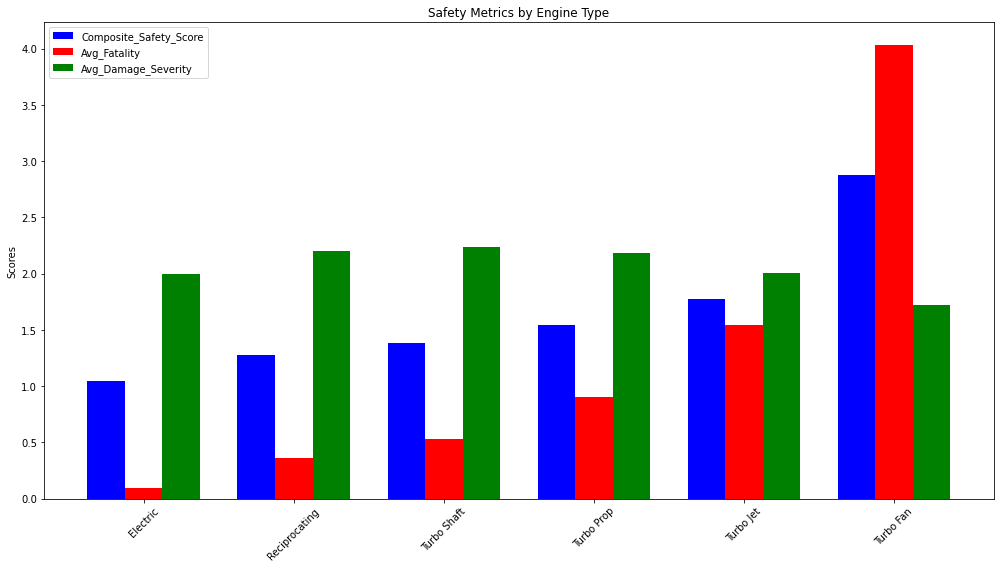

In [133]:
# Visualization shows side-by-side comparison of Composite Safety Score, Average Fatalities, and Average Damage Severity for each engine type.

plt.figure(figsize=(14, 8))

engine_types = safest_engine_types['Engine.Type'].unique()
metrics = ['Composite_Safety_Score', 'Avg_Fatality', 'Avg_Damage_Severity']
colors = ['blue', 'red', 'green']
width = 0.25

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(engine_types)) + i * width, safest_engine_types[metric], width=width, label=metric, color=colors[i])

plt.xticks(np.arange(len(engine_types)) + width, engine_types, rotation=45)
plt.ylabel('Scores')
plt.title('Safety Metrics by Engine Type')
plt.legend()
plt.tight_layout()
plt.show()



## Engine Number Visualization

This visualization displays the composite safety scores, average fatalities, and average damage severity across different numbers of engines. It demonstrates that while fatalities are lowest for single engine aircrafts, damage severity is lowest for three engine aircrafts. The composite safety score is lowest for single engine aircrafts, indicating that they are, overall, the safest.


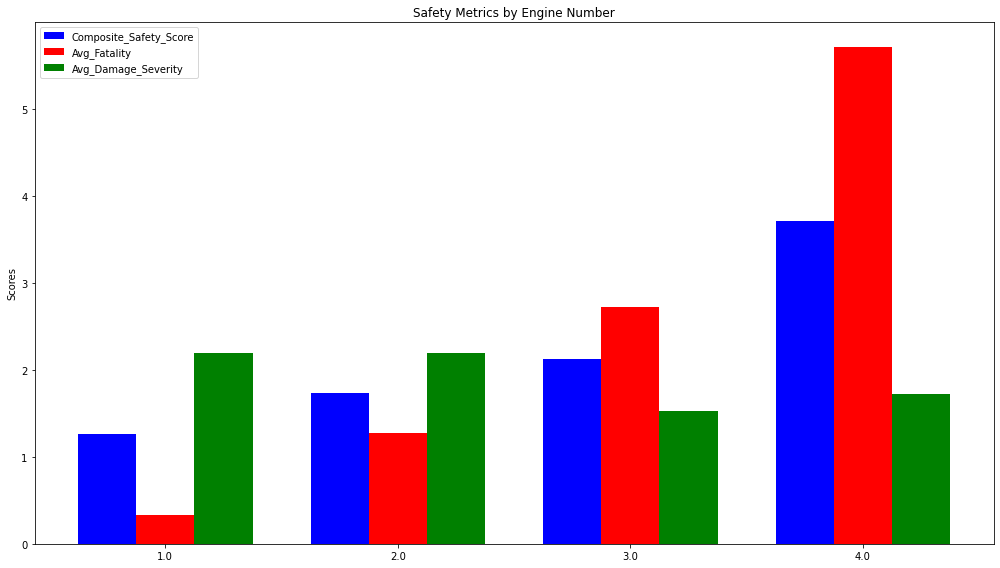

In [134]:
# Visualization compares Composite Safety Score, Average Fatalities, and Average Damage Severity for aircraft by engine number, excluding 0 and 8 engines.
plt.figure(figsize=(14, 8))

filtered_engine_numbers = safest_engine_numbers[~safest_engine_numbers['Number.of.Engines'].isin([0, 8])]

engine_numbers = filtered_engine_numbers['Number.of.Engines'].unique()
metrics = ['Composite_Safety_Score', 'Avg_Fatality', 'Avg_Damage_Severity']
colors = ['blue', 'red', 'green']
width = 0.25

for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(engine_numbers)) + i * width, filtered_engine_numbers[metric], width=width, label=metric, color=colors[i])

plt.xticks(np.arange(len(engine_numbers)) + width, engine_numbers)
plt.ylabel('Scores')
plt.title('Safety Metrics by Engine Number')
plt.legend()
plt.tight_layout()
plt.show()


## Top 5 Safest Models Visualization

This visualization displays the composite safety scores for the top 5 safest aircraft models identified in my analysis. It demonstrates the superior safety performance of these five models, indicating their potential for those prioritizing safety in aircraft selection.


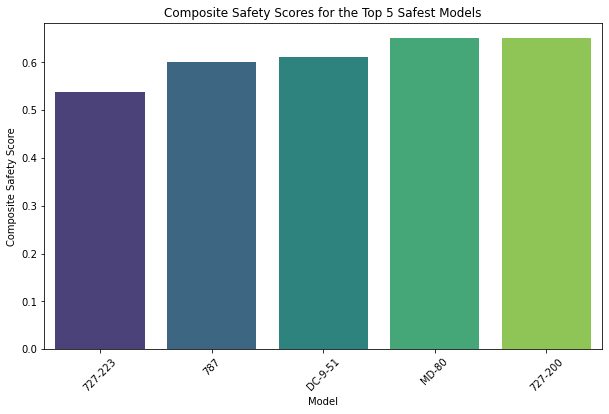

In [132]:
top_5_safest_models = safest_models.head()

plt.figure(figsize=(10, 6))

sns.barplot(x='Model', y='Composite_Safety_Score', data=top_5_safest_models, palette='viridis')

plt.title('Composite Safety Scores for the Top 5 Safest Models')
plt.xticks(rotation=45)
plt.ylabel('Composite Safety Score')
plt.xlabel('Model')
plt.show()

## Analysis Summary and Recommendations

### Descriptive Statistics Overview

My analysis covered several key features: Engine Type, Number of Engines, and specific aircraft Models. I used "Total Fatal Injuries" and "Damage Severity," a numerical indicator of aircraft damage, to inform measure safety and to create a composite safety score.

- **Engine Types**: I observed variations in safety levels across different engine types. Electric engines had significantly lower average fatalities but also had few data entries. Reciprocating engines were second-safest, and also made up a large proportion of the datset. 
- **Number of Engines**: Single-engine aircraft had the lowest composite safety scores as well as the least total average fatalities. However, three-engine aircraft had the least average damage severity, with single, double and quadruple engine aircraft having similiar scores in this metric. Additionally, the 5 safest models (by composite safety score) each had one engine.
- **Top 5 Safest Models**: Four of the five safest models (727-223, 787, 727-200, and MD-80) showed zero fatalities, showcasing exceptional safety levels. Additionally, each of the top five models had average damage severity scores ranging from 1.077 to 1.30, indicating that any aircraft damage beyond what would be classified as minor is a rarity. 

### Justification for Feature Inclusion

The inclusion of Engine Type and Number of Engines was necessary for understanding safety dynamics across different aircraft configurations. This is because these features were the most indicative of safety outcomes in comparison to others such as "Amateur built." The analysis of specific Models allowed for more specific and actionable safety recommendations including specific aircraft to be purchased. 

### Data Limitations

- The limited number of entries for Electric engine types may skew perceptions of their safety.
- The vast diversity in aircraft models (over 10,326 unique models) and the fact that many of them do not show up frequently in the dataset makes it difficult to make determinations that are generalizable across them all.
- The dataset only includes flights that result in an incident or accident. This prevents any determinations from being made in regard to whether one aircraft is more or less likely to have an accident/incident than another. 

### Project Implications

The project demonstrates important insights for stakeholders, my findings suggest that engine type and the number of engines in an aircraft are significant determinants of that aircraft's safety level. By prioritizing aircraft with lower composite safety scores, companies can enhance operational safety, their passengers' safety, and safeguard their aircraft investment. 

### Recommendations

1. **Prioritize Aircraft with Single Engines and Reciprocating Engines**: These categories showed lower average fatalities and damage severity, indicating higher safety levels and better flight outcomes in the instance of an incident or accident.
2. **Focus on Top Performing Models**: Aircraft like the 727-223, 787, 727-200, and the MD-80 have demonstrated superior safety records and should be considered for new purchases.
3. **Further Research on Electric Engines**: Despite high safety scores, the limited data on electric engines calls for more extensive investigation before making any purchasing decisions.

### Supporting Findings

- Electric engines, despite minimal data, show potential as safer alternatives.
- Reciprocating engines, which are quite common across the dataset, show a strong balance between performance and safety and come in second in regard to their composite safety score.
- The exceptionally high safety scores of the aforementioned models demonstrate the importance of investigating specific models rather than just assessing engine configurations. 

By utilizing these recommendations, the company can navigate their aircraft purchase in a manner that prioritizes safety. Continued data collection and analysis, especially around emerging technologies like electric engines, will further refine these recommendations. Additionally, further data collection and analysis regarding the ratio of flights without incident/accident to flights with incidents/accidents would be pivotal in further understanding which models are safest. 
